6.4 Machine Learning Task on EcoFashion Dataset

# Table of Contents - this script contains the following

In [ ]:
01 Importing Libraries

In [ ]:
02 Importing Data

In [ ]:
03 Data Cleaning

In [ ]:
04 Data Prep for Regression Analysis

In [ ]:
05 Regression Analysis

# 01 Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02 Importing Data

In [12]:
path= r'/Users/serenakunzmann/Documents/CareerFoundry-Python/05-2025 EcoFashion Insights 2024 /Data/'

In [20]:
merged=pd.read_csv(os.path.join(path,'Prepared Data','merged_df_GDP.csv'), index_col=False)

In [41]:
df=pd.read_csv(os.path.join(path, 'Prepared Data','cleaned_sustainable_fashon_csv'), index_col=False)

# 03 Data Cleaning

In [53]:
df.columns

Index(['Brand_ID', 'Brand_Name', 'Country', 'Year', 'Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Carbon_Footprint_MT',
       'Water_Usage_Liters', 'Waste_Production_KG', 'Recycling_Programs',
       'Product_Lines', 'Average_Price_USD', 'Market_Trend', 'Certifications'],
      dtype='object')

In [24]:
merged=merged.drop(['Rank'], axis=1)


In [26]:
merged=merged.drop(['Unnamed: 0'], axis=1)

In [32]:
merged = merged.rename(columns={'Material Self Life': 'Material Shelf Life'})


In [34]:
merged.head()

,Country,2024 GDP (Nominal) (billions of $),2025 GDP per capita (Nominal) ($),Continent,Brand_ID,Brand_Name,Year,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,...,Market_Trend,Certifications,Presidential Term,Material Shelf Life,Carbon_Footprint_MT_norm,Water_Usage_Liters_norm,Waste_Production_KG_norm,Green_Score,Average_Price_USD_norm,Global_Sustainability_Score
0,China,18748,13687,Asia,BRAND-0016,Brand_16,2013,Recycled Polyester,Yes,227.94,...,Stable,GOTS,Obama,20+ years,0.454810,0.200081,0.989049,0.461337,0.010273,44.078534
1,China,18748,13687,Asia,BRAND-0024,Brand_24,2020,Recycled Polyester,Yes,240.91,...,Stable,GOTS,Trump,20+ years,0.480807,0.816000,0.529356,0.404070,0.909985,63.399260
2,China,18748,13687,Asia,BRAND-0026,Brand_26,2018,Organic Cotton,No,234.31,...,Growing,GOTS,Trump,5–10 years,0.467578,0.531030,0.398736,0.534039,0.963056,52.239303
3,China,18748,13687,Asia,BRAND-0069,Brand_69,2016,Tencel,Yes,474.70,...,Growing,GOTS,Obama,5–10 years,0.949428,0.309134,0.219423,0.461662,0.637919,58.018786
4,China,18748,13687,Asia,BRAND-0071,Brand_71,2021,Tencel,Yes,394.67,...,Stable,Fair Trade,Biden,5–10 years,0.789012,0.277642,0.281318,0.516707,0.339765,48.913741


In [55]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,United States of America,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,United States of America,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [57]:
df.shape

(5000, 15)

In [40]:
merged['Global_Sustainability_Score'].mean() # Check the mean

49.87973600791889

In [44]:
merged['Global_Sustainability_Score'].median() # Check the medium

49.72014579

In [42]:
merged['Global_Sustainability_Score'].max() # Check the max

96.52857995

In [46]:
merged['Global_Sustainability_Score'].min() # Check the min

4.719788207

In [59]:
df['Average_Price_USD'].mean() # Check the mean

259.354216

In [61]:
df['Average_Price_USD'].median() # Check the median

258.615

In [63]:
df['Average_Price_USD'].max() # Check the max

499.94

# 04 Data Prep for Regression Analysis

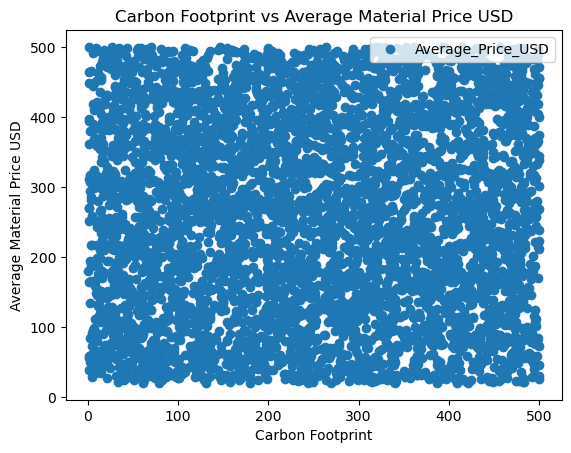

In [65]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x='Carbon_Footprint_MT', y='Average_Price_USD',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Carbon Footprint vs Average Material Price USD')  
plt.xlabel('Carbon Footprint')  
plt.ylabel('Average Material Price USD')  
plt.show()

In [67]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Carbon_Footprint_MT'].values.reshape(-1,1)
y = df['Average_Price_USD'].values.reshape(-1,1)

In [69]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05 Regression Analysis

In [72]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [74]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [76]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

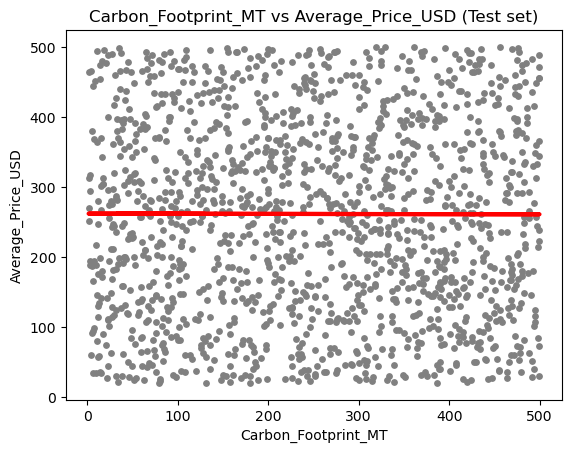

In [78]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Carbon_Footprint_MT vs Average_Price_USD (Test set)')
plot_test.xlabel('Carbon_Footprint_MT')
plot_test.ylabel('Average_Price_USD')
plot_test.show()

In [80]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0018934]]
Mean squared error:  18937.882877332446
R2 score:  -0.002042786437552957


Observations: The Slope coefficient of zero ( -0.002)  would mean that as carbon footprint rises, avergae material price stays the same. The Mean square error is very large, indicating that the regression line isn’t an accurate representation of the data. The R2 score is very close to 0, indicating a poor fit

In [85]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [87]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [104]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0018934]]
Mean squared error:  18982.982735738304
R2 score:  3.8039269465439673e-06


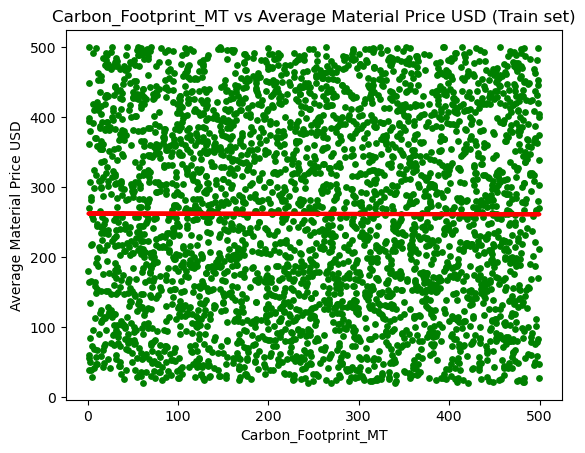

In [106]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Carbon_Footprint_MT vs Average Material Price USD (Train set)')
plot_test.xlabel('Carbon_Footprint_MT')
plot_test.ylabel('Average Material Price USD')
plot_test.show()

In [108]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,84.55,261.450190
1,489.48,261.533216
2,416.66,261.637542
3,207.64,261.011377
4,135.57,261.000111
5,493.03,261.108338
6,309.41,261.111291
7,57.04,261.090275
8,188.02,261.027774
9,58.24,261.550238


Final Interpretation of how well the line appears to fit the data -  This model isn’t doing a great job of explaining the relationship between the “Carbon_Footprint” and “Average Material Price USD” variables. The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything!)

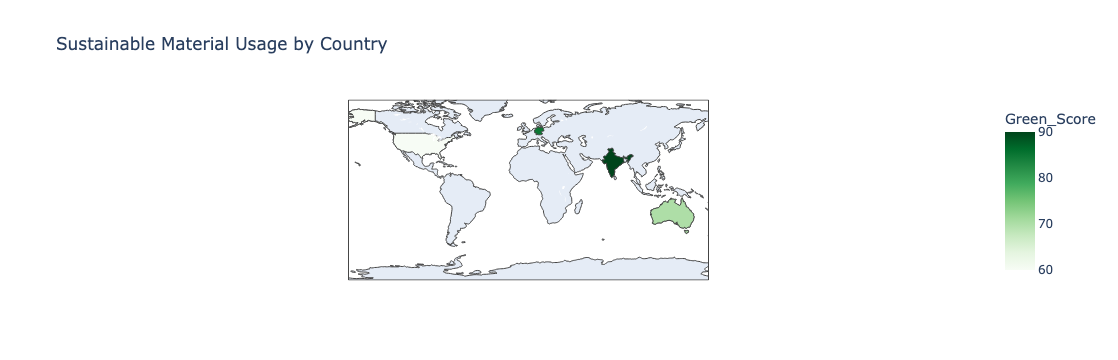

In [111]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Country': ['USA', 'Germany', 'India', 'Australia'],
    'Green_Score': [60, 85, 90, 70]  # Based on use of materials like Hemp, Tencel, etc.
}

df = pd.DataFrame(data)

# Choropleth
fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Green_Score",
                    color_continuous_scale="Greens",
                    title="Sustainable Material Usage by Country")

fig.write_html("sustainable_material_map.html")
fig.show()

In [115]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df[['Sustainability_Rating', 'Water_Usage_Liters', 'Waste_Production_KG', 'Year']]
y = df['Carbon_Footprint_MT']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

KeyError: "None of [Index(['Sustainability_Rating', 'Water_Usage_Liters', 'Waste_Production_KG',\n       'Year'],\n      dtype='object')] are in the [columns]"

In [117]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Predicted vs Actual Carbon Footprint')
plt.xlabel('Actual Carbon Footprint')
plt.ylabel('Predicted Carbon Footprint')
plt.show()

NameError: name 'y_pred' is not defined